# Projet arbre - itération 3
---

## Libraries and working directory

Pour la création d'un environnement virtuel conda, dans le terminal 
```
(base)  conda create --name projet_arbres python=3.12
(base)  conda activate projet_arbres
(projet_arbres)  conda install jupyter matplotlib pandas
```
Puis dans VS Code sélectionner le bon kernel.

In [1]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setting working directory to "Projet_Arbres"
os.chdir('/home/julien.dubois@Digital-Grenoble.local/Documents/Modules/1. Python/Projet_Arbres')
cwd = os.getcwd()
print('Current working directory:',cwd)

Current working directory: /home/julien.dubois@Digital-Grenoble.local/Documents/Modules/1. Python/Projet_Arbres


## Ressources

### Towards Data Science
http://medium.com/data-science/21-pandas-operations-for-absolute-beginners-5653e54f4cda

#### Introduction
Pandas is an easy to use and a very powerful library for data analysis. Like NumPy, it vectorises most of the basic operations that can be parallely computed even on a CPU, resulting in faster computation. The operations specified here are very basic but too important if you are just getting started with Pandas. You will be required to import pandas as ‘pd’ and then use ‘pd’ object to perform other basic pandas operations.

#### How to read data from a CSV file or a text file?

In [28]:
df = pd.read_csv('data/arbres_grenoble_epsg4326.csv', sep=',', header=0)

**Explanation:**

- `read_csv`’` function has a plethora of parameters and I have specified only a few, ones that you may use most often. A few key points:
- `header=0` means you have the names of columns in the first row in the file and if you don’t you will have to specify header=None
- `index_col = False` means to not use the first column of the data as an index in the data frame, you might want to set it to true if the first column is really an index.
- `names = None` implies you are not specifying the column names and want it to be inferred from csv file, which means that your header = some_number contains column names. Otherwise, you can specify the names in here in the same order as you have the data in the csv file. 
If you are reading a text file separated by space or tab, you could simply change the sep to be:
`sep = " "` or `sep='\t'`

In [3]:
df

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
1,34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
2,34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
3,34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
4,34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665,44741,ESP40744,AR40744,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP479,...,NaN,NaN,Grenoble Alpes Métropole,NaN,Moins de 10 m,NaN,Métropole de Grenoble,Tige,NaN,"45.19130940286065,5.721605325148501"
31666,44742,ESP40745,AR40745,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP479,...,NaN,NaN,Grenoble Alpes Métropole,NaN,Moins de 10 m,NaN,Métropole de Grenoble,Tige,NaN,"45.19135228905578,5.721902795690901"
31667,44841,ESP40796,AR40796,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"45.18358251458179,5.714244367296723"
31668,44842,ESP40797,AR40797,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"45.183576237082896,5.714287511308287"


#### How to create a data frame using a dictionary of pre-existing columns or NumPy 2D arrays?

In [4]:
# Using dictionary of pre-existing columns
# c1, c2, c3, c4 are column names.
c1 = [0 for i in range(5)]
c2 = [0 for i in range(5)]
c3 = [0 for i in range(5)]
d_dic ={'first_col_name':c1,'second_col_names':c2,'3rd_col_name':c3}
dfdic = pd.DataFrame(data = d_dic)


np_data = np.zeros((5,10)) #any_numpy_array
dfnp = pd.DataFrame(data=np_data, columns = [f"Column {i}" for i in range(10)])
dfnp

,Column 0,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Itération 1, version Pandas

In [21]:
# Extraire les lignes du csv
df = pd.read_csv('data/arbres_grenoble_epsg4326.csv', sep=',', header=0)

# Afficher les deux premières lignes
print("------------------------------------------")
print("== Affichage des deux premières lignes ==")
print(df.head(2))
print()

# Afficher la deuxième colonne de chacune de ces deux lignes.
print("------------------------------------------")
print("== Affichage de la deuxième colonne des deux premières lignes ==")
print(df["code"].head(2))
print()

# Extraire l'information concernant l'année de plantation pour l'ensemble des lignes
print("------------------------------------------")
print("== Extraire l'information concernant l'année de plantation pour l'ensemble des lignes ==")
print(df["anneedeplantation"])
print()

# Afficher les 50 premières lignes et les 50 dernières lignes de cette liste
print("------------------------------------------")
print("== Afficher les 50 premières lignes et les 50 dernières lignes de cette liste ==")
print(df["anneedeplantation"].head(50))
print(df["anneedeplantation"].tail(50))
print()

------------------------------------------
== Affichage des deux premières lignes ==
   elem_point_id      code      nom genre  genre_desc categorie  \
0          34835  ESP36318  AR36318   VEG  VEGETATION     ESP01   
1          34836  ESP36319  AR36319   VEG  VEGETATION     ESP01   

  categorie_desc sous_categorie sous_categorie_desc code_parent  ...  \
0          Arbre         ESP151     Arbre de voirie      ESP237  ...   
1          Arbre         ESP151     Arbre de voirie      ESP237  ...   

  diametrearbre  causeabattage              collectivite stationmetro  \
0           NaN            NaN  Grenoble Alpes Métropole          NaN   
1           NaN            NaN  Grenoble Alpes Métropole          NaN   

  hauteurarbre portarbre              structure  forme typenature  \
0          NaN       NaN  Métropole de Grenoble    NaN        NaN   
1          NaN       NaN  Métropole de Grenoble    NaN        NaN   

                           geo_point_2d  
0  45.167098421885385,5.74

In [62]:
# Combien d'arbres recensés ?
print(len(df))

# Pour combien d'arbres manque-t-il l'information concernant la date de plantation
print(pd.isna(df["anneedeplantation"]).value_counts())

# Combien d'arbres plantés l'année de ma naissance ?
print(df["anneedeplantation"].value_counts()[1997])

# La plus ancienne et récente année de plantation ?
print(min(df["anneedeplantation"].values))
print(max(df["anneedeplantation"].values))

# Combien d'arbres plantés année par année
print(df["anneedeplantation"].value_counts())

# Combien d'arbres plantés en moyenne chaque année ?
nb_arbres = len(df)
nb_annees = max(df["anneedeplantation"].values) - min(df["anneedeplantation"].values) + 1

treecount_per_year = df["anneedeplantation"].value_counts()
print(np.mean(treecount_per_year))
print(nb_arbres/nb_annees)



31670
anneedeplantation
False    31670
Name: count, dtype: int64
227
0
2024
anneedeplantation
1975    3367
0       2144
2001    1422
1980    1308
1970    1247
        ... 
1959      16
1924      11
1964       6
2021       5
2024       2
Name: count, Length: 69, dtype: int64
458.9855072463768
15.639506172839507


In [ ]:
# Quel maire a planté le plus d'arbres à Grenoble ?
df_maires = pd.read_csv('../data/maires_cleaned.csv')
df1 = df.merge(df_maires, left_on='anneedeplantation', right_on = 'annee', how='left')
df1 = df1.drop('annee', axis=1)
df1.maire.value_counts()

maire
Hubert Dubedout     11274
Michel Destot        8172
Éric Piolle          4800
Alain Carignon       4006
Albert Michallon      705
Léon Martin           507
Frédéric Lafleur       26
Stéphane Jay           25
Paul Mistral           11
Name: count, dtype: int64

In [117]:
# Pour combien d'arbres manque-t-il l'information concernant le genre botanique ?
nb_genre_botanique_manquant = df1.genre_bota.isna().value_counts()[True] + (df1.genre_bota=='inconnu').value_counts()[True]
print(nb_genre_botanique_manquant)

933


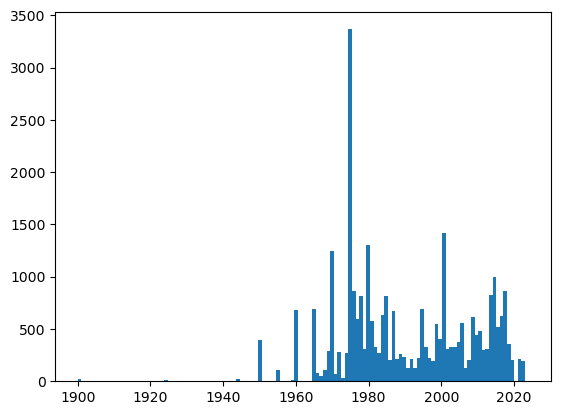

In [142]:
# Nombre d'arbres plantés par année
plt.hist(df1.anneedeplantation[df1.anneedeplantation >= 1900], bins=2024-1900+1)
plt.show()

## Itération 2, version Pandas

In [171]:
df1['espece_botanique'] = df1.genre_bota + ' ' + df1.espece
df1.espece_botanique.value_counts()

espece_botanique
Platanus acerifolia    3827
Acer pseudoplatanus    1314
Pinus nigra            1226
Carpinus betulus       1130
Acer platanoides        990
                       ... 
Cornus campestre          1
Pistacia sinensis         1
Melia azedarach           1
Carpinus baccata          1
Celtis orientalis         1
Name: count, Length: 418, dtype: int64

## Itération 3 suite
On ne peut pas calculer l'espérence de vie car l'année d'abattage n'est pas dispo, donc on s'intéresse plutôt à l'age moyen.

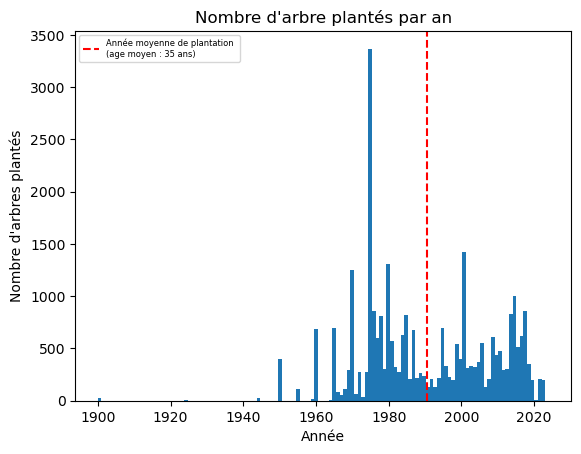

In [170]:
df1.age = 2025 - df1.anneedeplantation
df1.age = df1.age.replace(2025, None)
age_moyen = round(df1.age.mean())
plt.hist(df1.anneedeplantation[df1.anneedeplantation >= 1900], bins=2024-1900+1)
plt.axvline(2025-df1.age.mean(), color='red', linestyle='--', label=f"Année moyenne de plantation \n(age moyen : {age_moyen} ans)")
plt.legend()
plt.legend(prop={'size': 6})
plt.title("Nombre d'arbre plantés par an")
plt.xlabel("Année")
plt.ylabel("Nombre d'arbres plantés")
plt.show()